In [6]:
%matplotlib inline 

import numpy as np
import numpy.linalg as lin # module for performing linear algebra operations
import pandas as pd # pandas
from sklearn.linear_model import LinearRegression
import datetime as dt # module for manipulating dates and times
from __future__ import division
import matplotlib
import matplotlib.pyplot as plt # module for plotting 
import pprint
pp = pprint.PrettyPrinter()

from helpers.plot import relationship_plot
from helpers.data import df, column_details

matplotlib.pyplot.style.use('seaborn')

# Now do the same

In [7]:
from helpers.data import train_test_split
X = df[['weekday', 'day', 'week', 'occupancy']]
y = df['chilledWater-TonDays']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
lr_elect = LinearRegression()
lr_elect.fit(X_train,y_train)

y_lr = lr_elect.predict(X_test)

print("The test score R2: ", lr_elect.score(X_test, y_test))

print("The Linear Regression coefficients are")
pd.DataFrame(list(zip(X_train.columns, lr_elect.coef_[0])), columns = ['elect_features', 'linearRegr_Coefficients'])

The test score R2:  0.111685740968
The Linear Regression coefficients are


,elect_features,linearRegr_Coefficients
0,weekday,-4.506175
1,day,0.177772
2,week,-0.512499
3,occupancy,-33.638935


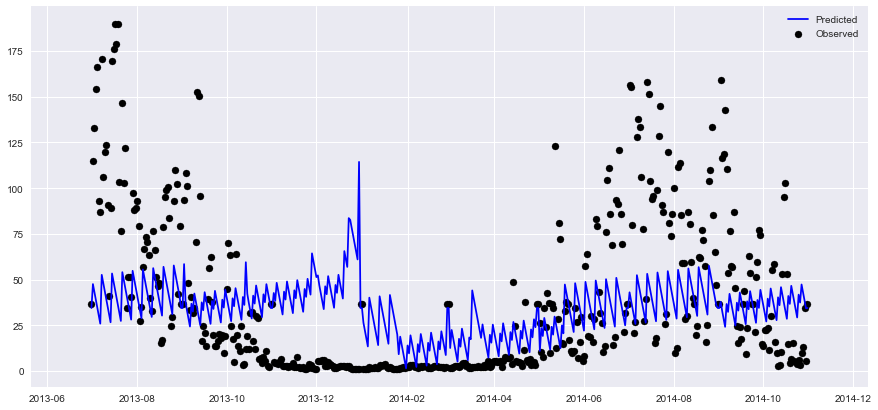

In [9]:
#Plot observed and Predicted electricity value 
fig = plt.figure(figsize=(15,7))
plt.scatter(X_test.index, y_test, label='Observed', color='k')
plt.plot(X_test.index, y_lr, label='Predicted', color='b')
plt.legend(loc='upper right')

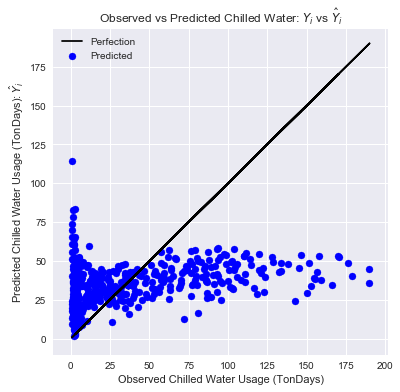

In [10]:
#Plot Observed vs. Linear Regression predicted usage.
fig = plt.figure(figsize=(6,6))
plt.plot(y_test, y_test, label='Perfection', c='k')
plt.scatter(y_test, y_lr, label='Predicted', c='b')
plt.xlabel('Observed Chilled Water Usage (TonDays)')
plt.ylabel("Predicted Chilled Water Usage (TonDays): $\hat{Y}_i$")
plt.title("Observed vs Predicted Chilled Water: $Y_i$ vs $\hat{Y}_i$")
plt.legend(loc='upper left')

# Now try with more features

In [13]:
from helpers.data import train_test_split
X = df[[col for col in df.columns if col not in ['electricity-kWh', 'steam-LBS', 'chilledWater-TonDays']]]
y = df['chilledWater-TonDays']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
lr_elect = LinearRegression()
lr_elect.fit(X_train,y_train)

y_lr = lr_elect.predict(X_test)

print("The test score R2: ", lr_elect.score(X_test, y_test))

print("The Linear Regression coefficients are")
pd.DataFrame(list(zip(X_train.columns, lr_elect.coef_[0])), columns = ['elect_features', 'linearRegr_Coefficients'])

The test score R2:  0.829855019323
The Linear Regression coefficients are


,elect_features,linearRegr_Coefficients
0,RH-%,0.456151
1,T-C,4.923129
2,Tdew-C,-2.661672
3,pressure-mbar,-0.086868
4,solarRadiation-W/m2,0.044143
5,windDirection,-0.024769
6,windSpeed-m/s,-1.128731
7,humidityRatio-kg/kg,2499.217387
8,coolingDegrees,3.869785
9,heatingDegrees,3.158538


# One Last Time with Steam Prediction

In [15]:
from helpers.data import train_test_split
X = df[[col for col in df.columns if col not in ['electricity-kWh', 'steam-LBS', 'chilledWater-TonDays']]]
y = df['steam-LBS']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [16]:
lr_elect = LinearRegression()
lr_elect.fit(X_train,y_train)

y_lr = lr_elect.predict(X_test)

print("The test score R2: ", lr_elect.score(X_test, y_test))

print("The Linear Regression coefficients are")
pd.DataFrame(list(zip(X_train.columns, lr_elect.coef_[0])), columns = ['elect_features', 'linearRegr_Coefficients'])

The test score R2:  0.942398931563
The Linear Regression coefficients are


,elect_features,linearRegr_Coefficients
0,RH-%,67.065545
1,T-C,649.009607
2,Tdew-C,-970.994036
3,pressure-mbar,-29.960928
4,solarRadiation-W/m2,-18.380946
5,windDirection,-7.724529
6,windSpeed-m/s,251.560418
7,humidityRatio-kg/kg,930240.058200
8,coolingDegrees,-272.306353
9,heatingDegrees,1978.981405


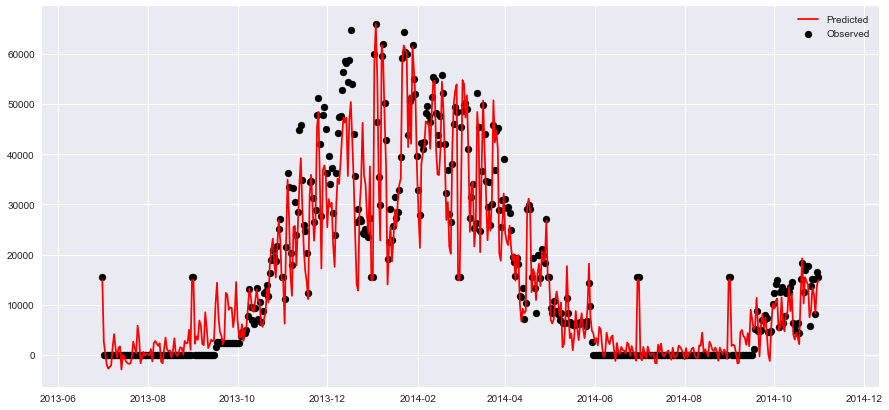

In [17]:
#Plot observed and Predicted electricity value 
fig = plt.figure(figsize=(15,7))
plt.scatter(X_test.index, y_test, label='Observed', color='k')
plt.plot(X_test.index, y_lr, label='Predicted', color='r')
plt.legend(loc='upper right')

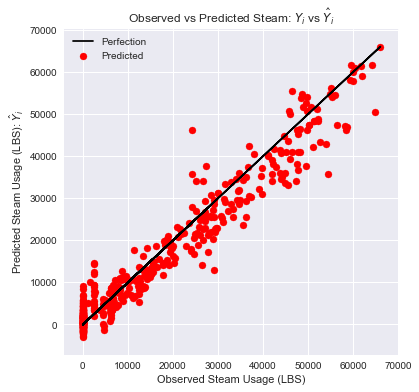

In [18]:
#Plot Observed vs. Linear Regression predicted usage.
fig = plt.figure(figsize=(6,6))
plt.plot(y_test, y_test, label='Perfection', c='k')
plt.scatter(y_test, y_lr, label='Predicted', c='r')
plt.xlabel('Observed Steam Usage (LBS)')
plt.ylabel("Predicted Steam Usage (LBS): $\hat{Y}_i$")
plt.title("Observed vs Predicted Steam: $Y_i$ vs $\hat{Y}_i$")
plt.legend(loc='upper left')